In [3]:
# Installing necessary packages
%pip install numpy pandas matplotlib scikit-learn

Note: you may need to restart the kernel to use updated packages.


Importing the installed packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Dataset Credits: Coursera

Now, we can load the dataset using padas.

In [6]:
df = pd.read_csv('d:\\course-ML-with-Python-IBM\\Simple Linear Regression\\dataset\\FuelConsumptionCo2.csv')

In [7]:
#Checking if the dataset is loaded correctly using sample function to load random data from the dataset.

df.sample(5) # Displaying 5 random rows from the dataset

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
615,2014,KIA,RIO,COMPACT,1.6,4,A6,X,8.7,6.3,7.6,37,175
966,2014,TOYOTA,4RUNNER 4WD,SUV - STANDARD,4.0,6,AS5,X,14.3,11.1,12.9,22,297
565,2014,JAGUAR,XKR CONVERTIBLE,MINICOMPACT,5.0,8,AS6,Z,15.9,10.9,13.7,21,315
94,2014,BMW,435i COUPE,COMPACT,3.0,6,A8,Z,11.4,7.3,9.6,29,221
550,2014,JAGUAR,XF,MID-SIZE,2.0,4,AS8,Z,12.3,8.2,10.5,27,242


In [8]:
#Now, we can the summary of the data using describe function.

df.describe() # Displaying the summary of the dataset

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In the stats above, we can see that the 75% of the cars have about 3 times more fuel consumption than the most efficient car. Also, we can see that the max of 60 is pretty high. From the above data, we can select few features which could affect the CO2 emmisions and plot them to see the realtionship.

In [13]:
#Now, we can create a new DataFrame with the features we want to use for our visualization.

df1 = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
df1.sample(5) # Displaying 5 random rows from the new DataFrame

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
483,2.4,4,8.7,200
765,4.7,8,14.2,327
711,2.5,4,7.3,168
420,5.8,8,13.2,304
928,6.6,12,15.6,359


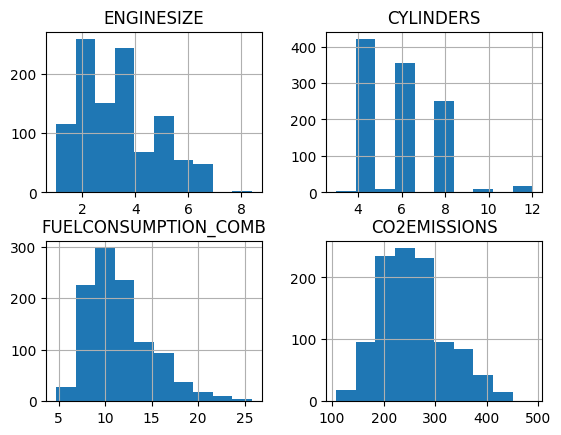

In [15]:
#Now, we can visualize the data using Histogram.

df1.hist()
plt.show() # Displaying the histogram of the data

We can use the visualizations that we have to identify patterns in the data.

From the visualizations, we notice that most of the cars have 4, 6, and  8 cylinders and engine sizes of 2 and 4. 

We also see that the fuel consumption and the CO2 emmission have a same pattern. We can now try to visualize the relationship between them using a scatterplot.

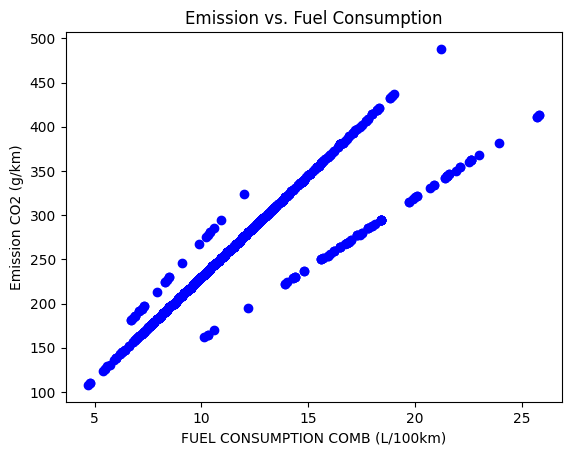

In [16]:
plt.scatter(df1.FUELCONSUMPTION_COMB, df1.CO2EMISSIONS, color='blue')
plt.xlabel("FUEL CONSUMPTION COMB (L/100km)")
plt.ylabel("Emission CO2 (g/km)")
plt.title("Emission vs. Fuel Consumption")
plt.show() # Displaying the scatter plot of the data

We can see that they have strong linear relationship! Now, we can plot between other features

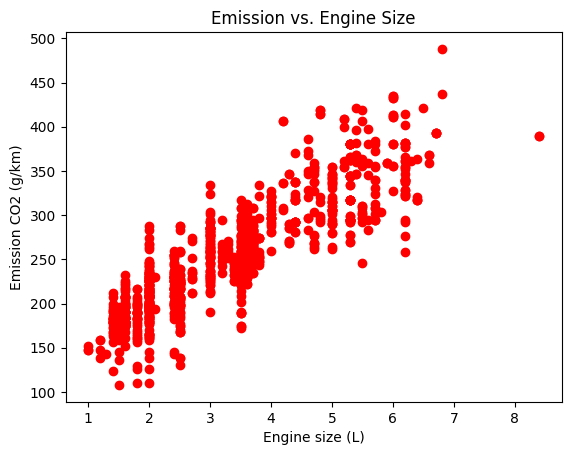

In [18]:
plt.scatter(df1.ENGINESIZE, df1.CO2EMISSIONS, color='red')
plt.xlabel("Engine size (L)")
plt.ylabel("Emission CO2 (g/km)")
plt.title("Emission vs. Engine Size")
plt.show() # Displaying the scatter plot of the data

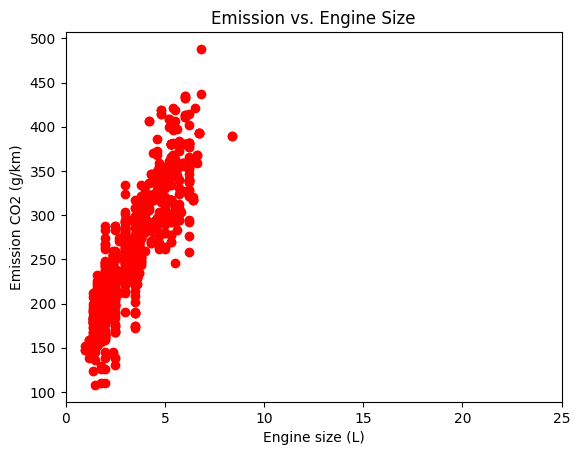

In [20]:
#The above graph shows linear relationship between Engine size and CO2 Emission. 
#But the scaling is different so, we can apply a  limit to x such that we can compare each plots.

plt.scatter(df1.ENGINESIZE, df1.CO2EMISSIONS, color='red')
plt.xlim(0, 25)
plt.xlabel("Engine size (L)")
plt.ylabel("Emission CO2 (g/km)")
plt.title("Emission vs. Engine Size")
plt.show() # Displaying the scatter plot of the data


Now, we can clearly see that they have some Linear Relationship. But their correlation is not as strong as the correlation between emmission and engine size.

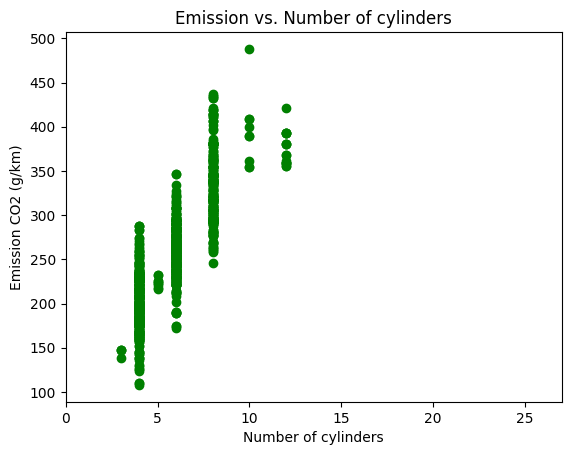

In [21]:
#Now, we can try for the number of cylinders.

plt.scatter(df1.CYLINDERS, df1.CO2EMISSIONS, color='green') 
plt.xlim(0, 27)
plt.xlabel("Number of cylinders")
plt.ylabel("Emission CO2 (g/km)")
plt.title("Emission vs. Number of cylinders")
plt.show() # Displaying the scatter plot of the data


The relationship b/w No. of cylinders and Emission is not that good. So, we can proceed with Fuel Consumption and Emission for our model training.

In [26]:
# We can extract the features and target variable from the dataset.

X = df1.FUELCONSUMPTION_COMB.to_numpy()
y = df1.CO2EMISSIONS.to_numpy()

print(X.shape) # Displaying the shape of the feature variable
print(y.shape) # Displaying the shape of the target variable

(1067,)
(1067,)


Now, we can split the extracted data into train and test data. This will help us evaluate our model using unseen data.

In [27]:
from sklearn.model_selection import train_test_split
# Splitting the dataset into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape) # Displaying the shape of the training feature variable
print(y_train.shape) # Displaying the shape of the training target variable

(853,)
(853,)


Now, we can build our Linear Regression Model

In [28]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [30]:
model.fit(X_train.reshape(-1,1), y_train)

LinearRegression()

We have now trained our Linear Regression Model using the test data we had. We can obtain the model's coefficient's (intercept and slope) using the below code.

In [32]:
print(f"Slope(Co-efficient):\t{model.coef_[0]}")
print(f"Intercept:\t{model.intercept_}")

Slope(Co-efficient):	16.18090078119919
Intercept:	69.10302617988452


Here, the coefficient and intercept determine our line of Best Fit for the model. Now, we can plot the line of Best-Fit along with the actual values of test data to see how accurate our line is.

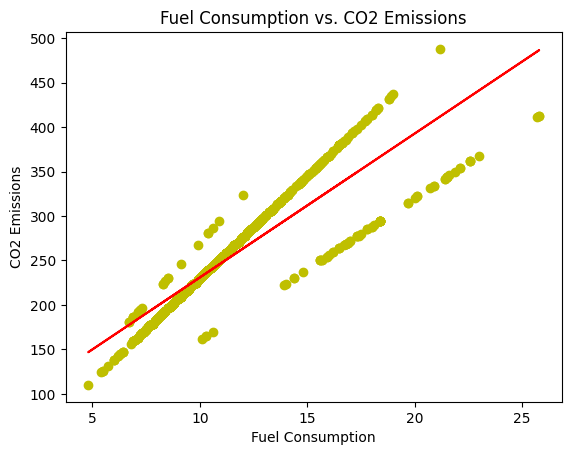

In [35]:
plt.scatter(X_train, y_train, c='y')
plt.plot(X_train,X_train * model.coef_[0] + model.intercept_, c= 'r')
plt.xlabel("Fuel Consumption")
plt.ylabel("CO2 Emissions")
plt.title("Fuel Consumption vs. CO2 Emissions")
plt.show()

Out model is performing good but we chose the wrong Independent Variable (Fuel Consumption) because this is linear but there are 3 different groups. Instead We should have taken Engine Size which had a single linear trend. Now, we'll do the steps from data splitting using the correct feature (Engine Size).

In [ ]:
#Exracting data from the dataset

X = df1.ENGINESIZE.to_numpy()
y = df1.CO2EMISSIONS.to_numpy()

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [38]:
new_model = LinearRegression()

In [39]:
new_model.fit(X_train.reshape(-1,1), y_train)

LinearRegression()

In [40]:
intercept = new_model.intercept_
slope = new_model.coef_[0]

Now, we have trained our new model with the correct features and have extracted the slope and intercept. Now, we can plot our line of best-fit along the actual trainind values.

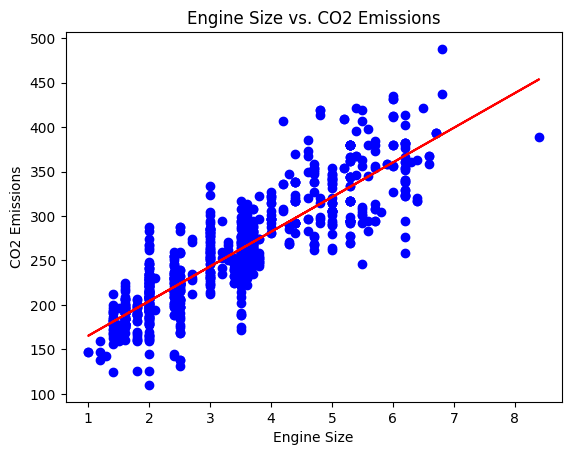

In [43]:
plt.scatter(X_train, y_train, c='b')
plt.plot(X_train, X_train*slope + intercept, c='r')
plt.xlabel("Engine Size")
plt.ylabel("CO2 Emissions")
plt.title("Engine Size vs. CO2 Emissions")
plt.show()

Now, we have trained our model. Now, we have to see the actual performance of our model by making it predict values for out test set. And then, we'll have to assess the preformance using metrics such as MAE, R2, MSE and RMSE.

In [45]:
y_pred = new_model.predict(X_test.reshape(-1,1))

Now, we have the predictions made by our model. Now, we can evaluate our model using different evaluation metrics. For this purpose, we can use the metrics module from sklearn.

In [46]:
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score, mean_squared_error

print(f"Mean Absolute Error : {mean_absolute_error(y_test, y_pred)}")
print(f"Mean Squared Error : {mean_squared_error(y_test, y_pred)}")
print(f"Root Mean Squared Error : {root_mean_squared_error(y_test, y_pred)}")
print(f"R2 Score : {r2_score(y_test, y_pred)}")

Mean Absolute Error : 24.09725741170784
Mean Squared Error : 985.9381692274999
Root Mean Squared Error : 31.399652374309813
R2 Score : 0.7615595731934373


Now, we have evaluated our model. Score-wise it seems pretty decent. For us to understand it even further, we can visualize this again.

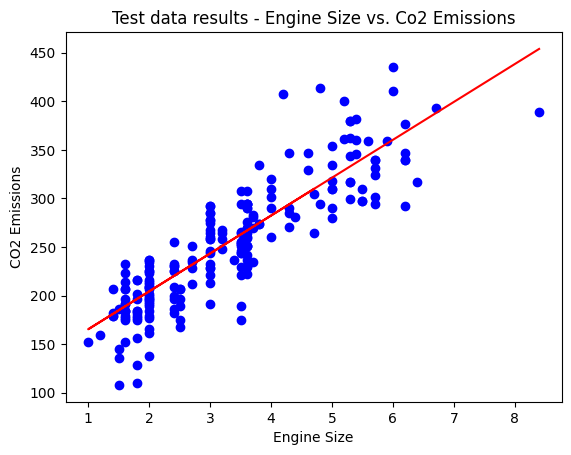

In [50]:
plt.scatter(X_test, y_test, c='b')
plt.plot(X_test, X_test* slope + intercept, c = 'r')
plt.xlabel("Engine Size")
plt.ylabel("CO2 Emissions")
plt.title("Test data results - Engine Size vs. Co2 Emissions")
plt.show()

We have successfully selected features and have trained our LinearRegression model.